# Semaine 11 - Réseau de neurones de base

Cette semaine nous allons écrire un réseau de neurones de base, que nous allons entraîner afin qu'il inverse des séquences de bits. Si vous réussissez à l'implémenter, vous pourrez ensuite vous amuser à l'utiliser sur d'autres types de données

## Importations et initialisations de variables

Nous n'allons utiliser que numpy pour cet exercice

In [69]:
import numpy as np
import random
import matplotlib.pyplot as plt

Nous avons un réseau à deux couches (l'input ne comptant pas pour une couche). Nous allons utiliser 300 séquences de bits pour l'entraînement.

In [49]:
# Nb de neurones sur chaque couche
n_in = 10
n_hidden = 8
n_out = 10

# Nb de 'training examples'
m = 300

In [50]:
alpha = 1  # Learning rate
epochs = 200  # nb iterations du gradient descent

## Définition des fonctions d'activation

Nous utiliserons la fonction tanh pour l'activation de la "hidden layer", et la sigmoïde pour la dernière couche. Implémentez-les si elle n'existent pas déjà dans numpy. Implémentez aussi la dérivée de l'une ou l'autre d'entre elles, le cas échéant.
Attention! Les fonctions doivent pouvoir traiter des vecteurs ou des matrices en effectuant l'opération sur chaque élément de ces derniers.

In [51]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [52]:
# Dérivée de tanh
def tanh_prime(x):
    return 1 - np.power(np.tanh(x), 2)

In [53]:
# Dérivée de sigmoid
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))


## Entraînement du réseau de neurones

Nous allons écrire une fonction qui fait une activation puis une rétropropagation, puis renvoie l'erreur (loss) et le gradient (toutes ces variables qui commencent par d...). L'itération sur les 200 epochs se fera dans un deuxième temps.

In [67]:
def train(X, Y, W1, W2, b1, b2):
    loss_history = []    
    for epoch in range(epochs):
        # Forward
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        # Backward
        dZ2 = A2 - Y
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims = True)
        dZ1 = np.multiply(np.dot(W2.T, dZ2), tanh_prime(Z1))
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims = True)
        # Parameter update (use the learning rate alpha here!)
        W1 = W1 - (alpha * dW1)
        W2 = W2 - (alpha * dW2)
        b1 = b1 - (alpha * db1)
        b2 = b2 - (alpha * db2)
        # Compute loss
        L = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
        loss = - np.sum(L) / m
        #loss = - (np.dot(Y, np.log(A2)) + np.dot((1 - Y), np.log(1 - A2))) / m
        loss_history.append(loss)
        print("Epoch %d, Loss: %.8f" % (epoch, loss))
    return loss_history, W1, W2, b1, b2

### Initialisation des paramètres du réseau

Attention, certains paramètres sont initalisés à zéro, d'autres non...

In [60]:
W1 = np.random.randn(n_hidden, n_in) * 0.01
W2 = np.random.randn(n_out, n_hidden) * 0.01
b1 = np.zeros((n_hidden, 1))
b2 = np.zeros((n_out, 1))
W2.shape

(10, 8)

## Génération des données d'entraînement

Ici il s'agit créer 300 séries de 10 chiffres binaires (1 et 0) pour les X.
Les Y seront ces mêmes séries, inversées.

In [56]:
# Data generation
X = np.random.binomial(1, 0.5, (n_in, m))
Y = X ^ 1
print(X)
print(Y)

[[1 0 0 ..., 1 0 1]
 [0 1 0 ..., 0 0 0]
 [1 0 1 ..., 1 0 1]
 ..., 
 [0 1 0 ..., 1 1 1]
 [1 0 1 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]]
[[0 1 1 ..., 0 1 0]
 [1 0 1 ..., 1 1 1]
 [0 1 0 ..., 0 1 0]
 ..., 
 [1 0 1 ..., 0 0 0]
 [0 1 0 ..., 1 1 0]
 [1 1 1 ..., 1 1 0]]


## Lancer l'entraînement du réseau

In [68]:
loss_history, W1, W2, b1, b2 = train(X, Y, W1, W2, b1, b2)

Epoch 0, Loss: 6.93101591
Epoch 1, Loss: 6.91897198
Epoch 2, Loss: 6.91139705
Epoch 3, Loss: 6.90578958
Epoch 4, Loss: 6.90044178
Epoch 5, Loss: 6.89387820
Epoch 6, Loss: 6.88444132
Epoch 7, Loss: 6.86990555
Epoch 8, Loss: 6.84706618
Epoch 9, Loss: 6.81132542
Epoch 10, Loss: 6.75644244
Epoch 11, Loss: 6.67488130
Epoch 12, Loss: 6.55947600
Epoch 13, Loss: 6.40671452
Epoch 14, Loss: 6.21991483
Epoch 15, Loss: 6.00886776
Epoch 16, Loss: 5.78516868
Epoch 17, Loss: 5.55738756
Epoch 18, Loss: 5.33013446
Epoch 19, Loss: 5.10609974
Epoch 20, Loss: 4.88798761
Epoch 21, Loss: 4.67893281
Epoch 22, Loss: 4.48180749
Epoch 23, Loss: 4.29838287
Epoch 24, Loss: 4.12900389
Epoch 25, Loss: 3.97283633
Epoch 26, Loss: 3.82840605
Epoch 27, Loss: 3.69412197
Epoch 28, Loss: 3.56888359
Epoch 29, Loss: 3.45336681
Epoch 30, Loss: 3.35517230
Epoch 31, Loss: 3.31036195
Epoch 32, Loss: 3.44003076
Epoch 33, Loss: 3.93804343
Epoch 34, Loss: 4.17205259
Epoch 35, Loss: 3.77592950
Epoch 36, Loss: 3.23217155
Epoch 37, L

### Visualiser la décroissance de l'erreur sur un graphe (optionnel)

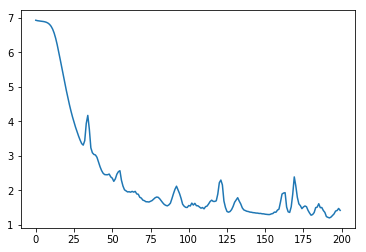

In [70]:
%matplotlib inline
fit = plt.figure()
ax = plt.axes()
ax.plot(loss_history)

## Évaluation du réseau de neurones

Écrivez une petite fonction qui, à partir des activation de la dernière couche du réseau, produit un vecteur de 1 et de 0. Normalement il suffit de copier-coller quelque lignes de code et d'ajouter quelque chose à la fin. Attention, ici, contrairement à ce qu'on avait dans le MOOC, la dernière couche a 10 valeurs de sortie, et non pas une seule.

In [ ]:
def predict(X, W1, W2, b1, b2):
   


### Tester la performance sur un seul exemple
Ici on génère un seul exemple (une série de 10 chiffres binaires), puis on fait prédire son inversion.

In [ ]:
X = np.random.binomial(1, 0.5, (n_in,1))
print(X.T)
print(predict(X, W1, W2, b1, b2).T)

### Tester la performance sur une série d'exemples